# **UTS, Komputasi Nuklir**
**Dhiya Salma Salsabila/24923304**

# Soal
1. Dalam sistem reaktor nuklir, ketika reaksi fisi terjadi, produk-produk fisi yang berbentuk gas seperti xenon dan krypton dihasilkan di dalam bahan bakar nuklir. Seiring dengan berjalannya waktu, gas-gas ini akan terakumulasi dalam struktur bahan bakar dan akhirnya mulai dilepaskan dari bahan bakar menuju bagian lain dari sistem reaktor. Pelepasan gas fisi ini bisa memengaruhi keamanan, keselamatan dan performa bahan bakar karena dapat menyebabkan tekanan internal yang berlebihan dan potensi membengkaknya bahan bakar. Pelepasan gas fisi dari bahan bakar dapat dimodelkan dengan persamaan diferensial sebagai berikut:
$$ \frac{dN}{dt} = -D \frac{\partial^2 N}{\partial x^2} -k N $$
Dimana:
- N : konsentrasi gas dalam bahan bakar
- D : koefisien difusi gas dalam bahan bakar
- x : posisi dalam bahan bakar
- k : kontanta pelepasan/desorpsi dari permukaan butiran
<br> Buatlah sebuah program untuk memecahkan persamaan diferensial tersebut menggunakan beberapa metoda seperti Euler, Heun Runge Kutta-4 dan RK45.
2. Buatlah sebuah program untuk mensimulasikan transfer panas pada sebuah batang bahan bakar berbentuk silinder (2 Dimensi, R-Z).

# Jawab
1. Pelepasan gas fisi dari bahan bakar dapat dimodelkan dengan persamaan diferensial sebagai berikut:
$$ \frac{dN}{dt} = -D \frac{\partial^2 N}{\partial x^2} -k N $$

Digunakan penyelesaian numerik:
Dengan Central Difference, maka pada suku orde 2 dapat di pecahkan :
$$ \frac{\partial^2 N}{\partial x^2} = \frac{\partial^2 N(x,t)}{\partial x^2} = \frac{N(x+\Delta x,t)-2N(x,t)+N(x-\Delta x,t)}{\Delta x^2}$$
Persamaan menjadi :
$$ \frac{dN(x,t)}{dt} = -D \frac{N(x+\Delta x,t)-2N(x,t)+N(x-\Delta x,t)}{\Delta x^2} -k N $$
misalkan:
$$ f(x,t) =  -D \frac{N(x+\Delta x,t)-2N(x,t)+N(x-\Delta x,t)}{\Delta x^2} -k N $$
- Metode Euler
$$  N(x, t+\Delta t) = N(x,t)+\Delta t f(x,t)$$
- Metode Heun
$$  N(x, t+\Delta t) = N(x,t)+ \frac{\Delta t}{2} [N(x,t)+ f(x,t)]$$
- Metode RK4
$$ k_1 = f(x_i, t_i) $$
$$ k_2 = f(x_i+\frac{1}{2}h, t_i+\frac{1}{2}k_1 h) $$
$$ k_3 = f(x_i+\frac{1}{2}h, t_i+\frac{1}{2}k_2 h) $$
$$ k_4 = f(x_i+\frac{1}{2}h, t_i+\frac{1}{2}k_3 h) $$
$$ k_4 = f(x_i +h, t_i+k_3 h) $$
$$ N_{i+1} = N_i +\frac{1}{6} (k_1 +2 k_2 + 2 k_3+ k_4)h $$
- Metode RK45
$$ k_1 =  f(x_i, t_i) $$
$$ k_2 = f(x_i+\frac{1}{4}h, t_i+\frac{1}{4}k_1 h) $$
$$ k_3 = f(x_i+\frac{3}{32}k_1+\frac{9}{32}k_2 h, t_i+\frac{3}{32}k_1+\frac{9}{32}k_2 h) $$
$$ k_4 = f(x_i+\frac{1932}{2197}k_1-\frac{7200}{2197}k_2+\frac{7296}{2197}k_3 h, t_i+\frac{1932}{2197}k_1-\frac{7200}{2197}k_2+\frac{7296}{2197}k_3 h) $$
$$ k_5 = f(x_i+\frac{439}{216}k_1- 8 k_2+\frac{3680}{513}k_3 -\frac{845}{4104} k_4 h, t_i+\frac{1932}{2197}k_1-\frac{7200}{2197}k_2+\frac{7296}{2197}k_3 h) $$
$$ k_6 = f(x_i+\frac{-8}{27}k_1+2 k_2-\frac{3544}{2565}k_3+\frac{1859}{4104} k_4-\frac{11}{40} k_5 h, t_i+\frac{-8}{27}k_1+2 k_2 - \frac{3544}{2565}k_3 + \frac{1859}{4104} k_4 - \frac{11}{40} k_5 h) $$
$$ N_{i+1} = N_i +\frac{16}{135} k_1 + \frac{6656}{12825} k_3 + \frac{28561}{56430} k_4 - \frac{9}{50} k_5 + \frac{2}{55} k_6 $$

C:\Users\Asus\AppData\Local\Temp\ipykernel_49260\875779656.py:23: RuntimeWarning: divide by zero encountered in log
  N[0,:] = np.log(x)
C:\Users\Asus\AppData\Local\Temp\ipykernel_49260\875779656.py:38: RuntimeWarning: invalid value encountered in subtract
  N[i + 1, 1:-1] = N[i, 1:-1] + dt * (-D * d2N[1:-1] - k * N[i, 1:-1]) # isi di bagian yang bukan syarat batas


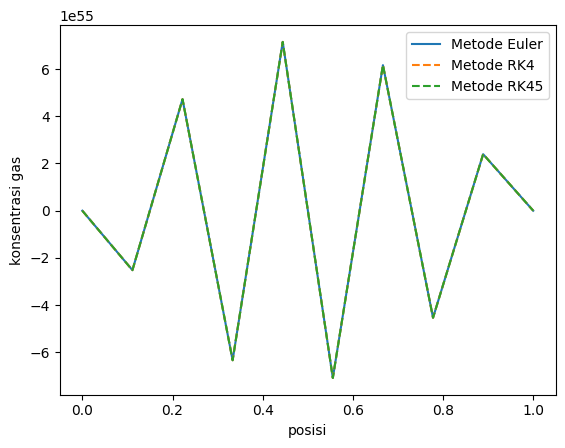

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial values
D = 1          # koefisien difusi gas
X = 1.0        # panjang batang bahan bakar
k = 0.7        # konstanta pelepasan/desorpsi
Nx = 10        # jumlah diskritisasi ruang x
Nt = 10        # jumlah diskritisasi waktu
tmax = 1       # waktu maksimal
dx = X / Nx    # delta x
dt = tmax / Nt  # delta t

N = np.zeros((Nt, Nx))
x = np.linspace(0, X, Nx)
t = np.linspace(0, X, Nt)

# keadaan awal, kek mana saya tau keadaan awalnya iniii :((
# asumsi aja di tengah bagian harusnya paling tinggi yaa
# N[0, Nx // 2] = 1
# atau pakai sin kayak transfer panas pak?? tersesat :((
# N[0, :] = np.sin(np.pi*x)
# mencoba segala rumus :))
N[0,:] = np.log(x)

def central_diff(N, dx):
    # turunan orde 2
    d2N = np.zeros_like(N)
    # iterasi posisi x
    for j in range(1, len(N) - 1):
        d2N[j] = (N[j + 1] - 2 * N[j] + N[j - 1]) / dx**2
    # syarat batas, dengan segala ke sok tauan dan ambil dari syarat transfer panas :))
    N[0] = N[1] # batas kiri
    N[-1] = N[-2] # batas kanan
    return d2N

# Metode Euler
def euler(D, N, dx, k, Nt):
    # iterasi waktu
    for i in range(Nt - 1):
        d2N = central_diff(N[i], dx)
        N[i + 1, 1:-1] = N[i, 1:-1] + dt * (-D * d2N[1:-1] - k * N[i, 1:-1]) # isi di bagian yang bukan syarat batas
    return N[-1] # biar bisa langsung gambar, jadi ambil yang akhir aja

# Metode RK4
def rk4(D, N, dx, k, Nt):
    # iterasi waktu
    for i in range(Nt - 1):
        k1 = dt * (-D * central_diff(N[i], dx) - k * N[i])
        k2 = dt * (-D * central_diff(N[i] + k1 / 2, dx) - k * (N[i] + k1 / 2))
        k3 = dt * (-D * central_diff(N[i] + k2 / 2, dx) - k * (N[i] + k2 / 2))
        k4 = dt * (-D * central_diff(N[i] + k3, dx) - k * (N[i] + k3))
        N[i + 1] = N[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return N[-1]

# Metode RK45
def rk45(D, N, dx, k, Nt):
    # iterasi waktu
    for i in range(Nt - 1):
        k1 = dt * (-D * central_diff(N[i], dx) - k * N[i])
        k2 = dt * (-D * central_diff(N[i] + k1 / 4, dx) - k * (N[i] + k1 / 4))
        k3 = dt * (-D * central_diff(N[i] + (3 / 32) * k1 + (9 / 32) * k2, dx) - k * (N[i] + (3 / 32) * k1 + (9 / 32) * k2))
        k4 = dt * (-D * central_diff(N[i] + (1932 / 2197) * k1 - (7200 / 2197) * k2 + (7296 / 2197) * k3, dx) - k * (N[i] + (1932 / 2197) * k1 - (7200 / 2197) * k2 + (7296 / 2197) * k3))
        k5 = dt * (-D * central_diff(N[i] + (439 / 216) * k1 - 8 * k2 + (3680 / 513) * k3 - (845 / 4104) * k4, dx) - k * (N[i] + (439 / 216) * k1 - 8 * k2 + (3680 / 513) * k3 - (845 / 4104) * k4))
        k6 = dt * (-D * central_diff(N[i] + (-8 / 27) * k1 + 2 * k2 - (3544 / 2565) * k3 + (1859 / 4104) * k4 - (11 / 40) * k5, dx) - k * (N[i] + (-8 / 27) * k1 + 2 * k2 - (3544 / 2565) * k3 + (1859 / 4104) * k4 - (11 / 40) * k5))
        N[i + 1] = N[i] + (16 / 135) * k1 + (6656 / 12825) * k3 + (28561 / 56430) * k4 - (9 / 50) * k5 + (2 / 55) * k6
    return N[-1]

hasil_euler = euler(D, N, dx, k, Nt)
hasil_rk4 = rk4(D, N, dx, k, Nt)
hasil_rk45 = rk45(D, N, dx, k, Nt)

# Plot hasil akhir
plt.plot(x, hasil_euler, label="Metode Euler")
plt.plot(x, hasil_rk4, "--", label="Metode RK4")
plt.plot(x, hasil_rk45,"--", label="Metode RK45")
plt.xlabel("posisi")
plt.ylabel("konsentrasi gas")
plt.legend()
plt.show()

kok malah kayak ekg :((, harusnya saya minta solusi analitiknya buat acuan dan tau grafik benernya kayak gimana :""

2. Transfer panas arah silinder R-Z
<br> Bentuk diferensial hukum fourier:
$$ \vec{q} = -k \nabla T $$
Dimana:
- $ \vec{q} $ : densitas aliran panas
- k : konduktivitas termal
- $\nabla$ T : gradien suhu

<br> Dengan menggunakan prinsip kekekalan energi:
$$ \frac{\partial T}{\partial t} = \alpha \nabla^2 T $$

<br> Operator laplace untuk koordinat 2 dimensi silinder arah R-Z:
$$ \nabla^2 T = \frac{1}{r} \frac{\partial^2 T}{\partial r^2}+ \frac{1}{r} \frac{\partial^2 T}{\partial z^2}$$
<br> Maka persamaan menjadi:
$$ \frac{\partial T(r,z,t)}{\partial t} = \alpha [\frac{1}{r} \frac{\partial^2 T(r,z,t)}{\partial r^2}+ \frac{1}{r} \frac{\partial^2 T(r,z,t)}{\partial z^2}]$$
Persamaan bisa disederhanakan menjadi
$$ \frac{\partial T(r,z,t)}{\partial t} =  \frac{\alpha}{r} [\frac{\partial^2 T(r,z,t)}{\partial r^2}+ \frac{\partial^2 T(r,z,t)}{\partial z^2}]$$

Digunakan penyelesaian dengan numerik menggunakan metode forward difference dan central difference, dimana:
- Forward Difference
$$ \frac{\partial T(r,z,t)}{\partial t} = \frac{T(r,z,t+\Delta t)-T(r,z,t)}{ \Delta t}$$
- Central Difference
$$ \frac{\partial^2 T(r,z,t)}{\partial r^2} = \frac{T(r+\Delta r,z,t)-2T(r,z,t)+T(r-\Delta r,z,t)}{\Delta r^2}$$
$$ \frac{\partial^2 T(r,z,t)}{\partial r^2} = \frac{T(r,z+\Delta z,t)-2T(r,z,t)+T(r,z-\Delta z,t)}{\Delta z^2}$$

Maka persamaan menjadi:
$$ \frac{T(r,z,t+\Delta t)-T(r,z,t)}{ \Delta t} = \frac{\alpha}{r} [\frac{T(r+\Delta r,z,t)-2T(r,z,t)+T(r-\Delta r,z,t)}{\Delta r^2} + \frac{T(r,z+\Delta z,t)-2T(r,z,t)+T(r,z-\Delta z,t)}{\Delta z^2}] $$

CFL:
$$  \alpha \frac{1}{r} \Delta t (\frac{1}{\frac{1}{\Delta r^2}+\frac{1}{\Delta z^2}}) \leq \frac{1}{2} $$

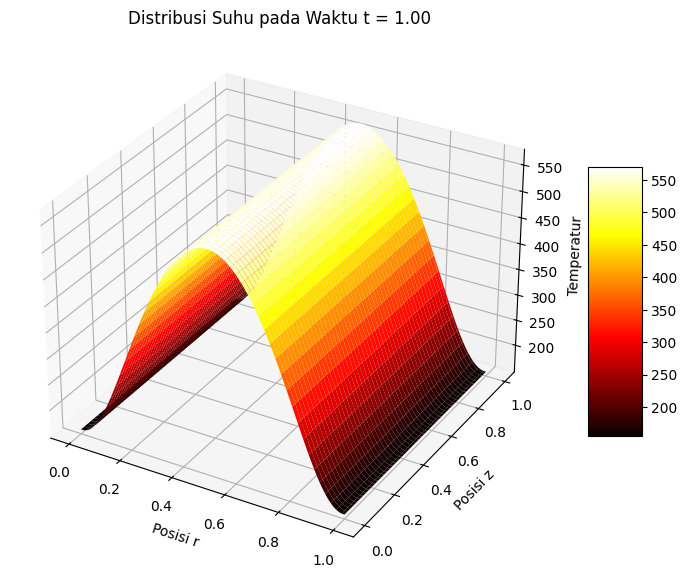

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial Values
R = 1.0                 # panjang batang 2D
WaktuMar = 1.0          # waktu maksimal
alpha = 0.5             # difusivitas termal
Nr = 100                # jumlah diskritisasi r
Nz = 100                # jumlah diskritisasi z
Nt = 100                # jumlah diskritisasi waktu
Tmin = 0                # suhu awal
Tmar = 600              # suhu paling tinggi/akhir

def transfer_panas(R, WaktuMar, alpha, Nr, Nz, Nt, Tmar):
    dr = R / Nr             # delta r
    dz = R / Nz             # delta z
    dt = min(dr**2,dz**2)/(2*alpha*1/R) #CFL
    r = np.linspace(0, R, Nr)
    z = np.linspace(0, R, Nz)
    t = np.linspace(0, WaktuMar, Nt)
    # Keadaan awal
    T = np.zeros((Nt, Nr, Nz))
    T[0, :, :] = Tmar*np.sin(np.pi * r)
    # Iterasi waktu
    for i in range(0, Nt-1):
        # Iterasi posisi r
        for j in range(1, Nr-1):
            # Iterasi poisisi z
            for k in range(1, Nz-1):
                T[i+1, j, k] = T[i, j, k] + (alpha * dt)/R  * (((T[i,j+1,k] - 2*T[i,j,k] + T[i,j-1,k])/dr**2) + ((T[i, j, k+1] - 2*T[i,j,k] + T[i,j,k-1])/dz**2))
        # Szarat batas
        T[i+1, :, 0] = T[i+1, :, 1]          # batas kiri
        T[i+1, :, -1] = T[i+1, :, -2]        # batas kanan
        T[i+1, 0, :] = T[i+1, 1, :]          # batas bawah
        T[i+1, -1, :] = T[i+1, -2, :]        # batas atas
    return T, r, z, t

T, r, z, t = transfer_panas(R, WaktuMar, alpha, Nr, Nz, Nt,Tmar)

def plot_grafik(T, r, z, t, index):
    # Membuat meshgrid untuk koordinat r dan z
    r, z = np.meshgrid(r, z)
    # Menggambarkan plot 3D
    fig = plt.figure(figsize=(10, 7))
    ar = fig.add_subplot(111, projection='3d')
    surf = ar.plot_surface(r, z, T[index], cmap='hot')
    ar.set_xlabel('Posisi r')
    ar.set_ylabel('Posisi z')
    ar.set_zlabel('Temperatur')
    ar.set_title(f'Distribusi Suhu pada Waktu t = {t[index]:.2f}')
    fig.colorbar(surf, ax=ar, shrink=0.5, aspect=5)
    plt.show()
    
plot_grafik(T , r, z, t, -1)

Aku serahkan kepada Allah, semoga mendapatkan hasil terbaik. Walau ngerjainnya tersesat dan banyak gatau soal kondisi batas, kondisi awal dan bagaimana nilai konstanta yang benar untuk setiap input :))